# **Classify heart disease using patients' maximum heart rate during strenuous exercise, and ST depression induced by exercise**
#### *An Phung, Bruce Zhang, Hellen Zhu, Wei Cao*

## **Introduction**

Heart disease (cardiovascular disease) encompasses various conditions affecting the heart and blood vessels, often leading to heart attacks due to arterial blockages (K.Srinivas et al., 2010). Early identification and treatment are crucial to prevent severe complications.

The Heart Attack dataset used provides 13 variables that are possibly linked to heart disease, with whether or not they developed the disease. This study aims uses the K-nearest neighbors (KNN) algorithm to predict heart disease likelihood, focusing on maximum heart rate, and exercise-induced ST depression

Low maximum heart rate and ST depression are early heart disease symptoms. A high heart rate is associated with a higher risk of cardiovascular events (Perret‐Guillaume et al., 2009), while ST depression on an electrocardiogram signals potential issues like myocardial ischemia (Kligfield et al., 1989).

Thus, the question being addressed is: ***Can heart disease be accurately predicted based on a patient’s maximum heart rate during strenuous exercise and ST depression induced by exercise?***

## **Method**

#### **Preprocessing and exploratory data analysis**
1. Importe libraries and dataset from the GitHub.
2. Clean and tidied data 
3. Split the data into training and testing sets.
4. Summarize the training set to analyze the correlation between the predictors and the classes.
5. Visualize the relationship between predictors `thalach`,`oldpeak` and Class `target` to get a deeper understanding of how the data is distributed.
#### **Finding the best $k$-value**
Before we can actually build our classifier, we need to find the best K-value considering the model accuracy:
1. Use the `recipe` function to center and scale the data.
2. Perform cross-validation with five folds, using `vfold_cv`, on the training data because this will give a more generalized results compared to a single validation set.
3. Create a k-nearest tuning model using `tune()`  to find the best value of K for KNN model.
4. Add the recipe and model to a workflow, using `tune_grid` to fit. Then, filter for `accuracy` and k-value with highest accuracy
5. Visualizing the relation between `k-value` and `accuracy` using line plot to choose the most well-performed $k\_value$.
6. Compare our model to majority classifier to provide the initial evaluation about the effectiveness of the classification approach.
#### **Building the Final Classifier Model**
1. Creating the new model with the best K-value found in the previous part using `nearest_neighbor`
2. Fitting the model and recipe in the workflow.
3. Visualize our results by plotting `thalach`(Max heart rate) on the x-axis and `oldpeak`(ST depression) on the y-axis, using `target` to colour the points.
2. Check for over/underfitting by visualizing the regions that the model has assigned to each class. This visualization also allowed us to quickly identify how the model perform, and correlation between different variables.
#### **Testing our classifier**
1. Used `predict` on the testing set to evaluate the classifier's predicition accuracy.
2. Produced a confusion matrix using `conf_mat` to get a deeper sight into the performance of our Classifier.

## **Preprocessing & Preliminary exploratory data analysis**

### *Importing libraries & dataset*

In [1]:
# Importing the libraries required to perform the analysis and setting the seed 
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
set.seed(1)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Loading Heart attack data set 
heart_data <- read_csv("Heart Attack Data Set.csv")
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal
1   63  1   3  145      233  1   0       150     0     2.3     0     0  1   
2   37  1   2  130      250  0   1       187     0     3.5     0     0  2   
3   41  0   1  130      204  0   0       172     0     1.4     2     0  2   
4   56  1   1  120      236  0   1       178     0     0.8     2     0  2   
5   57  0   0  120      354  0   1       163     1     0.6     2     0  2   
6   57  1   0  140      192  0   1       148     0     0.4     1     0  1   
7   56  0   1  140      294  0   0       153     0     1.3     1     0  2   
8   44  1   1  120      263  0   1       173     0     0.0     2     0  3   
9   52  1   2  172      199  1   1       162     0     0.5     2     0  3   
10  57  1   2  150      168  0   1       174     0     1.6     2     0  2   
11  54  1   0  140      239  0   1       160     0     1.2     2     0  2   
12  48  0   2  130      275  0   1       139     0     0.2     2     0  2   
13  49  1   1  130      266  0   1       171     0     0.6     2     0  2   
14  64  1   3  110      211  0   0       144     1     1.8     1     0  2   
15  58  0   3  150      283  1   0       162     0     1.0     2     0  2   
16  50  0   2  120      219  0   1       158     0     1.6     1     0  2   
17  58  0   2  120      340  0   1       172     0     0.0     2     0  2   
18  66  0   3  150      226  0   1       114     0     2.6     0     0  2   
19  43  1   0  150      247  0   1       171     0     1.5     2     0  2   
20  69  0   3  140      239  0   1       151     0     1.8     2     2  2   
21  59  1   0  135      234  0   1       161     0     0.5     1     0  3   
22  44  1   2  130      233  0   1       179     1     0.4     2     0  2   
23  42  1   0  140      226  0   1       178     0     0.0     2     0  2   
24  61  1   2  150      243  1   1       137     1     1.0     1     0  2   
25  40  1   3  140      199  0   1       178     1     1.4     2     0  3   
26  71  0   1  160      302  0   1       162     0     0.4     2     2  2   
27  59  1   2  150      212  1   1       157     0     1.6     2     0  2   
28  51  1   2  110      175  0   1       123     0     0.6     2     0  2   
29  65  0   2  140      417  1   0       157     0     0.8     2     1  2   
30  53  1   2  130      197  1   0       152     0     1.2     0     0  2   
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮  ⋮   
274 58  1   0  100      234  0   1       156     0     0.1     2     1  3   
275 47  1   0  110      275  0   0       118     1     1.0     1     1  2   
276 52  1   0  125      212  0   1       168     0     1.0     2     2  3   
277 58  1   0  146      218  0   1       105     0     2.0     1     1  3   
278 57  1   1  124      261  0   1       141     0     0.3     2     0  3   
279 58  0   1  136      319  1   0       152     0     0.0     2     2  2   
280 61  1   0  138      166  0   0       125     1     3.6     1     1  2   
281 42  1   0  136      315  0   1       125     1     1.8     1     0  1   
282 52  1   0  128      204  1   1       156     1     1.0     1     0  0   
283 59  1   2  126      218  1   1       134     0     2.2     1     1  1   
284 40  1   0  152      223  0   1       181     0     0.0     2     0  3   
285 61  1   0  140      207  0   0       138     1     1.9     2     1  3   
286 46  1   0  140      311  0   1       120     1     1.8     1     2  3   
287 59  1   3  134      204  0   1       162     0     0.8     2     2  2   
288 57  1   1  154      232  0   0       164     0     0.0     2     1  2   
289 57  1   0  110      335  0   1       143     1     3.0     1     1  3   
290 55  0   0  128      205  0   2       130     1     2.0     1     1  3   
291 61  1   0  148      203  0   1       161     0     0.0     2     1  3   
292 58  1   0  114      318  0   2       140     0     4.4     0     3  1   
293 58  0   0  170      225  1   0       146     1     2.8     1     2  1   


### *Cleaning the dataset*

To clean the dataset, we need to select the variables required to perform further analysis and assign apporpriate data types to each variable. Furthermore, the factors in target is changed from "0/1" to "positive/negative" to more clearly communicate that the classes represent positive or negative diagnosis. 

In [3]:
# Selecting the variables needed to perform the analysis 
heart_clean_data <- heart_data |>
        select(target, thalach, oldpeak) |>
        # Assigning apporpriate data types 
        mutate(target = as_factor(target))|>  
        # Change target to factor POSITIVE/NEGATIVE
         mutate(target = fct_recode(target, "Positive" = "1", "Negative" = "0"))
heart_clean_data      

target   thalach oldpeak
1   Positive 150     2.3    
2   Positive 187     3.5    
3   Positive 172     1.4    
4   Positive 178     0.8    
5   Positive 163     0.6    
6   Positive 148     0.4    
7   Positive 153     1.3    
8   Positive 173     0.0    
9   Positive 162     0.5    
10  Positive 174     1.6    
11  Positive 160     1.2    
12  Positive 139     0.2    
13  Positive 171     0.6    
14  Positive 144     1.8    
15  Positive 162     1.0    
16  Positive 158     1.6    
17  Positive 172     0.0    
18  Positive 114     2.6    
19  Positive 171     1.5    
20  Positive 151     1.8    
21  Positive 161     0.5    
22  Positive 179     0.4    
23  Positive 178     0.0    
24  Positive 137     1.0    
25  Positive 178     1.4    
26  Positive 162     0.4    
27  Positive 157     1.6    
28  Positive 123     0.6    
29  Positive 157     0.8    
30  Positive 152     1.2    
⋮   ⋮        ⋮       ⋮      
274 Negative 156     0.1    
275 Negative 118     1.0    
276 Negative 168     1.0    
277 Negative 105     2.0    
278 Negative 141     0.3    
279 Negative 152     0.0    
280 Negative 125     3.6    
281 Negative 125     1.8    
282 Negative 156     1.0    
283 Negative 134     2.2    
284 Negative 181     0.0    
285 Negative 138     1.9    
286 Negative 120     1.8    
287 Negative 162     0.8    
288 Negative 164     0.0    
289 Negative 143     3.0    
290 Negative 130     2.0    
291 Negative 161     0.0    
292 Negative 140     4.4    
293 Negative 146     2.8    
294 Negative 150     0.8    
295 Negative 144     2.8    
296 Negative 144     4.0    
297 Negative 136     0.0    
298 Negative  90     1.0    
299 Negative 123     0.2    
300 Negative 132     1.2    
301 Negative 141     3.4    
302 Negative 115     1.2    
303 Negative 174     0.0

### *Splitting the dataset*

The dataset is split into 75% training set and 25% testing set to create an reliable training model while maintaining an accurate evaluation of its performance with the testing set. 

In [4]:
# Splitting data frame into 75% training set, 25% testing set
heart_split <- initial_split(heart_clean_data, prop = 0.75, strata = target)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### *Summarizing data*

In order to analyze the correlation between the predictors and the classes, we start by finding the mean of each predictor for the two classes. In addition, using `group_by` and  `summarize`, the number of observations in each class was obtained to check for class imbalances. The number of missing rows were also obtained to account for any missing data

In [5]:
# Exploratory data analysis with training data 
heart_ana <- heart_training |>
             group_by(target) |>
             summarize(n_of_obs = n(),
                       mean_thalach = mean(thalach),
                       mean_oldpeak= mean(oldpeak),
                       missing_rows= sum(is.na(heart_training)))

heart_ana

target   n_of_obs mean_thalach mean_oldpeak missing_rows
1 Negative 103      139.9417     1.5825243    0           
2 Positive 123      155.9756     0.6455285    0

From the summary above, we see that patients who have a positive diagnosis for heart disease generally has a lower ST depression value and a higher maximum heart rate value compared to patients who have a negative diagnosis. The number of observations for positive and negative diagnosis is fairly even with the positive diagnosis being slightly higher, indicating that there is no problem of significant class imbalance. In addition, the summary suggests that there is no missing data in this dataset as the number of missing rows for both classes is 0. 

### *Visualizing the relationship between Predictors and Class*

A scatter plot of Max heart rate vs. ST depression is plotted to further analyze the relationship between the two predictors and the classes we are predicting  

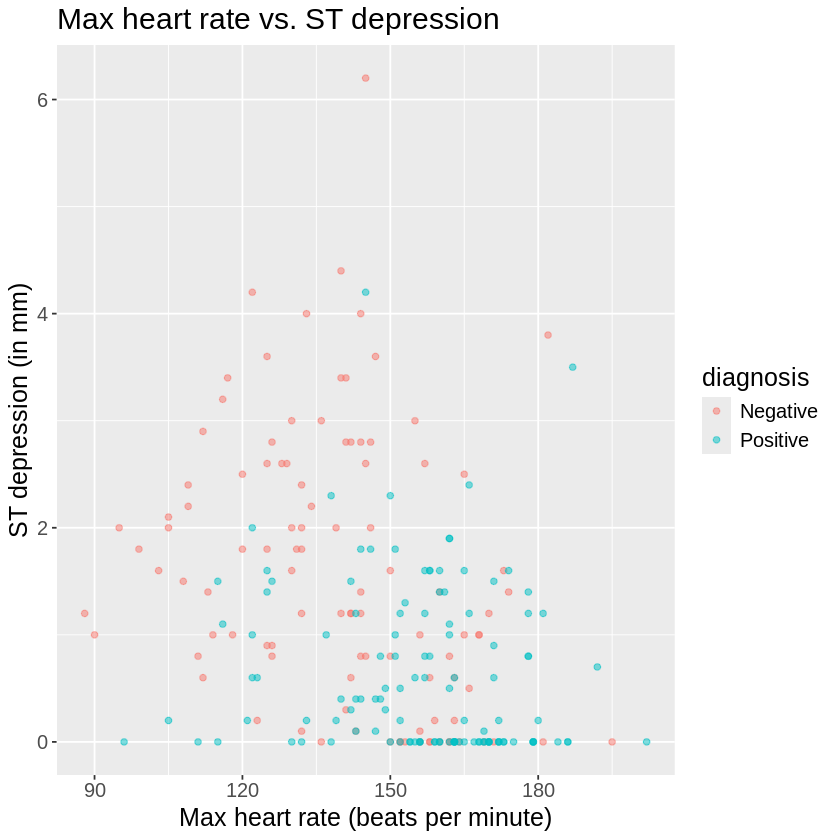

In [6]:
# Plotting the training data as a scatter plot 
heart_plot <- ggplot(heart_training, aes(x = thalach, y = oldpeak, color = target)) +
            geom_point(alpha = 0.5) +
            labs(x = "Max heart rate (beats per minute)", y = "ST depression (in mm)", color = "diagnosis", title = "Max heart rate vs. ST depression") +
            theme(text = element_text(size = 15))
heart_plot

Analyzing the visualization above, we can see that the positive and negative class has a distinct grouping with both predictors showing clear trends; The negative diagnosis concentrated on the top left and the positive diagnosis concentrated on bottom right. This affirms the suitability of using ST depression and Max heart rate as predictors when building the classification model for this dataset. 
The results shown in the visualization also align with what was analyzed in the data summary: patients with a positive diagnosis tend to have a lower ST depression value and higher maximum heart rate. 

## **Finding the best $k$ value**

### *Creating model*

To create a model for finding the best k value, we: 

1. Set seed to 1 to get the same fold each time.
2. Create a recipe for training data and center and scale all predictors.
3. Build a specification using k-nearest neighbours and setting `neighbors = tune`.
4. Split the data into 5 equal chunks using `vfold_cv`.
5. Repeat each validation for k values from 1 to 10.

In [7]:
set.seed(1)

# Preprocesssing the data 
Heart_recipe <- recipe(target ~ thalach + oldpeak, data = heart_training) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

# Tuning the model 
Heart_spec <- nearest_neighbor(weight_func = "rectangular", 
                               neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

# Creating 5-fold cross validation 
Heart_vfold <- vfold_cv(heart_training, v = 5, strata = target)

# Testing K values from 1 to 100 
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

k_model <- workflow() |>
        add_recipe(Heart_recipe) |>
        add_model(Heart_spec) |>
        tune_grid(resamples = Heart_vfold, grid = k_vals) |>
        collect_metrics() |>
        filter(.metric == "accuracy") 

best_k_performance <- k_model |>
                      arrange(desc(mean)) |>
                      head(1) 
best_k_performance |> select(neighbors,mean)
best_k <- best_k_performance|>
          pull(neighbors)  

neighbors mean     
1 23        0.7300395

### *Visualizing accuracy*

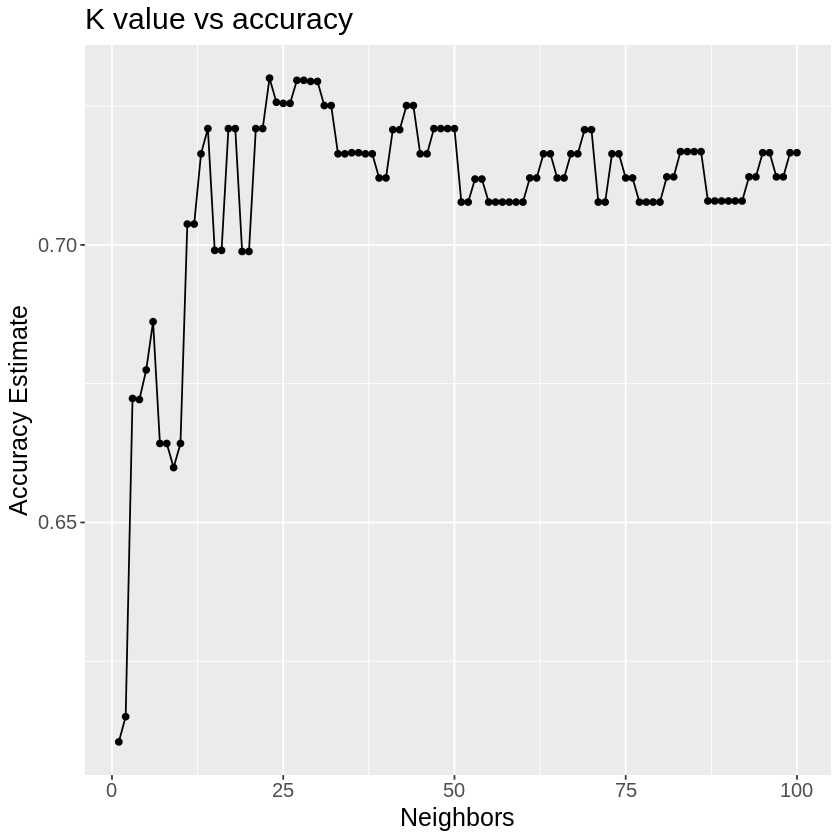

In [8]:
#Creating a scatter plot based on the model build above 
k_plot <- ggplot(k_model, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "K value vs accuracy") +
        theme(text = element_text(size = 15))
k_plot

Analyzing the visualization above, we see that the accuracy peaked when $k = 23$. Thus, both the visualization and data summary done above agrees that a K value of that will provide the best accuracy in our classification model 

### *Comparing to a majority classifier*

In [9]:
#Comparing accuracy of classifier with majority classifier
heart_proportions <- heart_training |>
    group_by(target) |>
    summarize(n=n()) |>
    mutate(percent = 100*n/nrow(heart_training))
heart_proportions

target   n   percent 
1 Negative 103 45.57522
2 Positive 123 54.42478

From the above tibble, we can expect the majority classifier to have the accuracy of arround 54% as the `Positive` diagnosis represents the majority of the training data with 54.42% of all results. Therefore, the best $k$ value with the accuracy of 73% means that the K-nearest neighbors classifier improved quite a bit on the basic majority classifier.

## **Building the final model**

We will perform the following steps: <br>

1. Build a new specification model with our chosen k-value, and input it into the `fit` function to create a new workflow. <br>
2. Visualize the predictions for heart training dataset
5. Visualizes the predictions that this trained K-nearest neighbors model will make on a large range of new observations: create a grid of synthetic new observations using the `expand.grid` function, predict the label of each, and visualize the predictions.
6. Analyze classifier performance and decide how it is fitting on the plot. <br>

### *Creating our Classifier*

In [10]:
set.seed(1)

# Creating the model with the neighbour number of 23
Heart_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 23) |>
    set_engine("kknn") |>
    set_mode("classification")

# Inputting recipe and new model into the workflow
Heart_fit <- workflow() |>
    add_recipe(Heart_recipe) |>
    add_model(Heart_final_spec) |>
    fit(data = heart_training)

### *Visualizing the model's performance & Checking for over/underfitting*

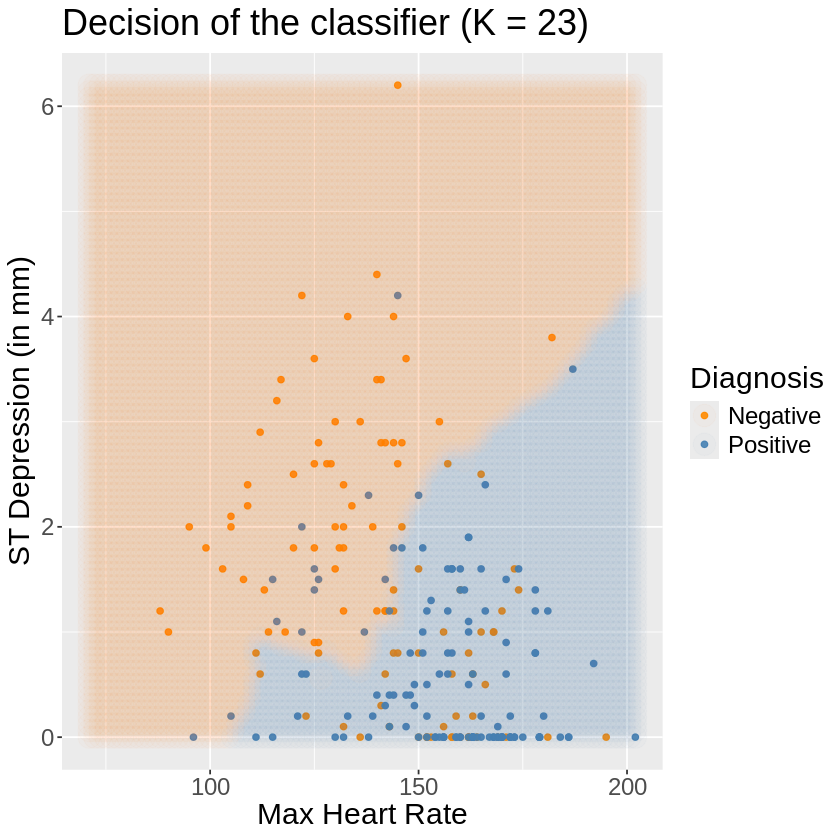

In [11]:
set.seed(1)

# Create the grids
Thalach_grid <- seq(min(heart_clean_data$thalach), 
                max(heart_clean_data$thalach), 
                length.out = 100)

ST_grid <- seq(min(heart_clean_data$oldpeak), 
               max(heart_clean_data$oldpeak), 
               length.out = 100)

Heart_grid <- as_tibble(expand.grid(thalach = Thalach_grid, oldpeak = ST_grid))

Heart_predict <- predict(Heart_fit, Heart_grid)

# Predict the new observations
Pred_table <- bind_cols(Heart_predict, Heart_grid)

# Checking for over/underfitting with visualized plot and colored regions
heart_result <- ggplot() + 
                geom_point(data = heart_training, mapping = aes(x = thalach, y = oldpeak, color = target), alpha = 0.9) +
                geom_point(data = Pred_table, mapping = aes(x = thalach, y = oldpeak, color = .pred_class), alpha = 0.02, size = 6) +
                labs(x = "Max Heart Rate", y = "ST Depression (in mm)", color = "Diagnosis", title = "Decision of the classifier (K = 23)") +
                theme(text = element_text(size = 18)) +
                scale_color_manual(values = c("darkorange", "steelblue"))
                
heart_result

- The decision boundary, indicated by the change in background color from yellow to light blue, separates these two groups diagonally across the plot. Most orange dots (Negative) are on the left side with yellow background while most blue dots (Positive) are on the right side with light blue background, though there’s some overlap.  This observation hints that patients with higher *Max heart rate* and lower *ST Depression* might be more likely to be predicted as Positive.
- Accordingly, the classifier seems to have a reasonable performance as it mostly separates the positive and negative diagnosis. However, there are still some misclassifications visible, especially in the overlap region around Max Heart Rate of 150 and ST Depression of 2. 
- Based on the plot above where $K = 23$, we also observe that the classifier does not show any signs of underfitting nor overfitting because there is no overly simple nor overly jagged edges, which is the ideal scenario. This means that we can somewhat be confident about handling and diagnosing any new data given.

## **Testing classifier model**

### *Generate Confusion Matrix & Calculate Related Values from the prediction on Test set*

Finally, we need to evaluate the overall performance of our classifier. First, we predict the class categories for the test set using `predict` and then add the column of predictions to the original test data, creating the `heart_test_predictions` data frame. Then, we will calculate the prediction accuracy and create the confusion matrix to predict how well our predictions match the actual labels in the test set. To do this, we will use the `metrics` and `conf_mat` function as depicted below.

In [12]:
set.seed(1)
# Create the prediction
heart_test_predictions <- predict(Heart_fit, heart_testing)|>
  bind_cols(heart_testing)
head(heart_test_predictions)

#find the accuracy of the predictions
heart_test_accuracies<-heart_test_predictions|>
  metrics(truth = target, estimate = .pred_class) |>
  filter(.metric == "accuracy")
heart_test_accuracies

#find the confusion matrix: shows how many test set labels of each type are predicted correctly and incorrectly
confusion<- heart_test_predictions |>
             conf_mat(truth = target, estimate = .pred_class)


.pred_class target   thalach oldpeak
1 Positive    Positive 172     1.4    
2 Positive    Positive 173     0.0    
3 Positive    Positive 160     1.2    
4 Negative    Positive 114     2.6    
5 Positive    Positive 161     0.5    
6 Positive    Positive 179     0.4

.metric  .estimator .estimate
1 accuracy binary     0.7662338

In [13]:
confusion

          Truth
Prediction Negative Positive
  Negative       19        2
  Positive       16       40

**Calculating Precision, Recall** \
Based on the matrix above, we can calculate the `precision` and `recall` value for our classifier model:
$$precision = \frac {40}{16+40} = 71.43\%$$
$$recall = \frac {40}{2+40} = 95.24\%$$

### *Evaluating the Confusion Matrix*

The `.estimate` variable shows that the estimated accuracy of the classifier on the test data was about 77% a. Although there are still some cases of misdiagnosis, it looks like a good accuracy. However, since the prediction accuracy does not tell the kinds of mistakes the classifier makes, we will take further examine on the confusion matrix to get a comprehensive view of performance.

Based on the confusion matrix, the precision and recall is about 71% and 95%, respectively. 
- In this case, the precision of 71.43% suggests that when the classifier predicts that a person has a heart problem, it is correct about 71.43% of the time. This means that there is a relatively low rate of false positives, which is important in the context of healthcare because misdiagnosing someone with a heart problem when they don't have one can lead to unnecessary treatment and anxiety for the patient.
- The high recall of 95.24% indicates that the classifier is very effective at identifying individuals who actually have heart problems. It means that out of all the people who truly have heart problems, the classifier correctly identifies 95.24% of them. This is crucial in healthcare because missing a diagnosis (false negatives) could result in serious consequences for the patient's health. .

We can see that the classifier is more likely to be overdiagnose (16) than under diagnose (2). We can see that the classifier's precision and recall metrics reveal a trade-off. While the high recall ensures that most individuals with heart problems are correctly identified, the precision indicates that there's a small risk of overdiagnosis, where individuals without heart problems may receive unnecessary treatments or procedures.

However, the model's performance remains relatively strong, acknowledging that further examinations are necessary before reaching a definitive conclusion.

## **Discussion**

The predictive question we have put forward is: Can heart disease be accurately predicted based on a patient’s maximum heart rate during strenuous exercise and ST depression induced by exercise? In this study, we addressed this question by constructing and evaluating a classifier based on these two predictors: maximum heart rate during strenuous exercise, and ST depression induced by exercise. 

#### **Expected Findings & Outcome**

We expect to achieve a classifier accuracy of over 80% due to the problem context where early and accurate detection of positive diagnoses in heart problems is important. Our aim also stems from the recognition of the strong correlation between the predictors and the predictions: a positive diagnosis correlates with lower ST depression values and higher maximum heart rates.

Our classifier's accuracy was around 77%, which falls short of the expected value. However, this is still a decent overall accuracy and the high recall of 95% suggests that this classifier seems to perform relatively well, especially on the main concern of ensuring that most of the positive instances are captured. Recall, then, might compensate for the shortfall in accuracy, although at the expense of some false positive predictions.

In heart disease diagnosis, a classifier with high recall is more crucial because of the critical issues when patient does not receive appropriate medical attention for misdiagnosing people with heart disease (positive) as healthy. In this situation, we put more weight on recall and decide to sacrify some precision in the interest of achieving high recall. With the classifier with high recall, if there is a positive observation (people suffer from heart diseases) in the test data, we can trust that the classifier will find it.

One possible reason for this trend could be that although the positive class is well-represented and distinct in the dataset, the negative class is be more varied or overlapping with the positive class, leading to misclassifications. To address this, for further studies, we can investigate misclassified instances to understand the reasons behind false positives and false negatives, which can provide insights into potential shortcomings of the model and guide further improvements.

Our findings also align with the hypothesis previously proposed. This is best depicted in the graph Decision of the classifier in the Testing Classifier model part above where the region for Positive Diagnosis is at the bottom right of the graph with a higher Max Heart Rate and a smaller value for ST depression.

#### **Impact of the findings**

The model could potentially be deployed in clinical settings to aid physicians in identifying patients at risk of heart disease. Implementing this predictive model holds significant potential for improving cardiovascular care. By enabling early detection and tailored interventions, such models can improve patient outcomes while optimizing resource allocation within healthcare systems. Accordingly, the high accuracy of these models is crucial for ensuring improved outcomes and healthcare resource optimization.

The findings also confirm the strong correlation between the selected predictors and the presence of heart disease. This underscores the importance of these features in heart disease prediction models and suggests that they should continue to be included in future studies and clinical assessments.


#### **Further Question**
- How does the model perform on diverse datasets from various demographics?
- Can additional factors like age, gender, and cholesterol levels improve heart disease prediction?
- Can the classifier detect early heart disease risk over time?
- What are the practical considerations for implementing the classifier in clinical settings?


## **Reference**

1. *Heart attack*. (2021, September 26). Kaggle. \
   https://www.kaggle.com/datasets/pritsheta/heart-attack
2. Kligfield, P., Ameisen, O., & Okin, P. M. (1989). Heart rate adjustment of ST segment depression for improved detection of coronary artery disease. Circulation, 79(2), 245–255. \
   https://doi.org/10.1161/01.cir.79.2.245
3. Perret‐Guillaume, C., Joly, L., & Bénétos, A. (2009). Heart rate as a risk factor for cardiovascular disease. Progress in Cardiovascular Diseases, 52(1), 6–10. \
   https://doi.org/10.1016/j.pcad.2009.05.003
4. Srinivas, K., Rao, G. R., & Govardhan, A. (2010, August 1). Analysis of coronary heart disease and prediction of heart attack in coal mining regions using data mining techniques. In IEEE Conference Publication [Conference paper]. IEEE Xplore.
https://ieeexplore.ieee.org/abstract/document/5593711